In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
data=pd.read_csv('/kaggle/input/datasettt/owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [4]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [5]:
data[data['location']=='Chile']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30791,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213
30792,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30793,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30794,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30795,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31528,CHL,South America,Chile,2022-03-01,3061019.0,0.0,23584.000,42353.0,0.0,118.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31529,CHL,South America,Chile,2022-03-02,3098110.0,37091.0,25282.714,42411.0,58.0,120.000,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31530,CHL,South America,Chile,2022-03-03,3122802.0,24692.0,24129.571,42683.0,272.0,126.857,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31531,CHL,South America,Chile,2022-03-04,3147434.0,24632.0,23080.143,42809.0,126.0,127.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN


Text(0, 0.5, 'New cases')

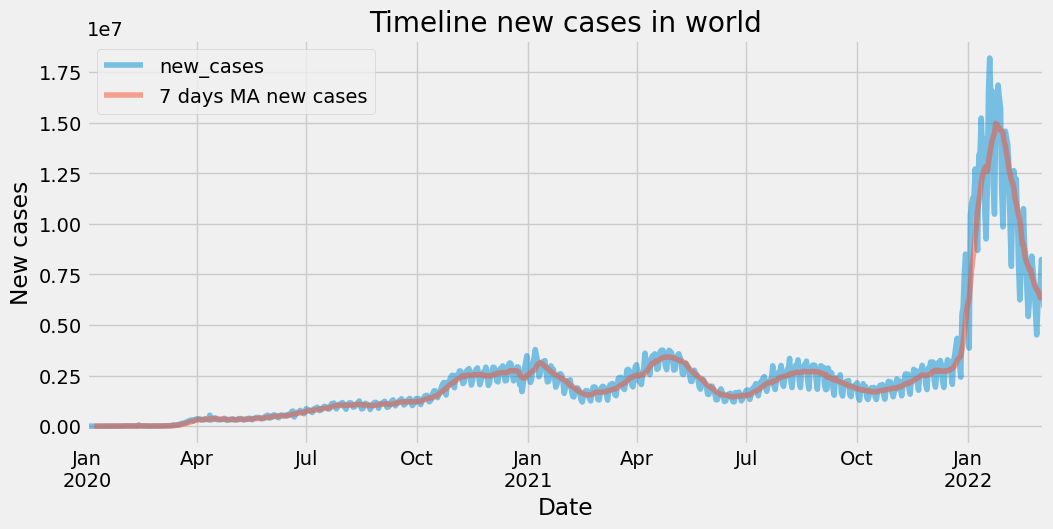

In [6]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['7 days MA new cases'] = 0
data2['7 days MA new cases'] = data2['new_cases'].rolling(7).mean() #Moving average of new cases with window=10
data2['7 days MA new deaths'] = 0
data2['7 days MA new deaths'] = data2['new_deaths'].rolling(7).mean()  #Moving average of new deaths with window=10

data2[['new_cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

Text(0, 0.5, 'New deaths')

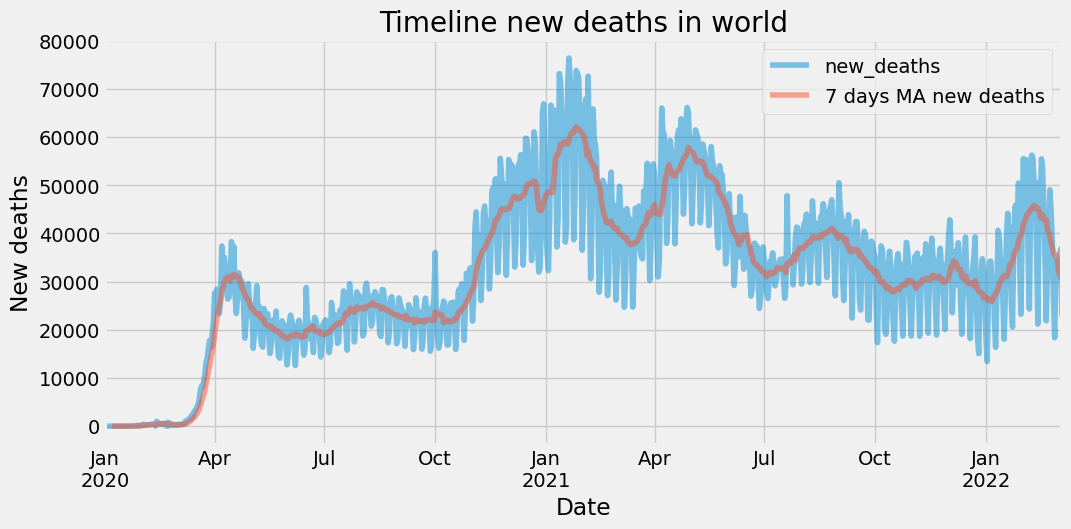

In [7]:
data2[['new_deaths', '7 days MA new deaths']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')

In [9]:
def create_and_plot_df(df, country):
    #Selecting the 7 key columns for country in dataset
    df=df[df['location']==country].copy()
    df=df[['date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()

    #Convert to datetime
    df.date = pd.to_datetime(df['date'])

    #Fixing the mistakes in chilean data.
    if country=='Chile':
        df.loc[df['date']=='2021-10-07','total_deaths'] = 37533
        df.loc[df['date']=='2021-10-07','new_deaths'] = 21
        df.loc[df['date']=='2021-10-08','new_deaths'] = 9
        df.loc[df['date']=='2021-10-07','new_deaths_per_million'] = 1.092
        df.loc[df['date']=='2021-10-08','new_deaths_per_million'] = 0.468
    else:
        pass
  
    #Fixing the mistakes in uk data.
    if country=='United Kingdom':
        df.loc[df['date']=='2022-01-31','new_cases'] = 92368
        df.loc[df['date']=='2022-02-01','new_deaths'] = 219
        df.loc[df['date']=='2022-01-31','new_cases_per_million'] = 1354
        df.loc[df['date']=='2022-02-01','new_deaths_per_million'] = 3.211
        df.loc[df['date']=='2021-04-09','new_cases'] = 3150
        df.loc[df['date']=='2021-04-09','new_cases_per_million'] = 46
        df.loc[df['date']=='2021-05-18','new_cases'] = 2412
        df.loc[df['date']=='2021-05-18','new_cases_per_million'] = 35
    else:
        pass
  
    #Set the date as index and compute moving average with window=7 for new_cases and new_deaths
    df.set_index('date', inplace=True)
    df['7 days MA new cases'] = 0
    df['7 days MA new cases'] = df['new_cases'].rolling(7).mean()
    df['7 days MA new deaths'] = 0
    df['7 days MA new deaths'] = df['new_deaths'].rolling(7).mean()
    df['7 days MA new cases per million'] = 0
    df['7 days MA new cases per million'] = df['new_cases_per_million'].rolling(7).mean()
    df['7 days MA new deaths per million'] = 0
    df['7 days MA new deaths per million'] = df['new_deaths_per_million'].rolling(7).mean()
  
    #Plot new cases, new deaths and people vaccinated 
    df[['new_cases', '7 days MA new cases']].plot(figsize = (15, 5), alpha = 0.5)
    plt.title(f'Timeline new cases in {country}')

    df[['new_deaths', '7 days MA new deaths']].plot(figsize = (15, 5), alpha = 0.5)
    if country=='Chile':
        plt.ylim([0,400])
    else:
        pass
    plt.title(f'Timeline new deaths in {country}')

    df[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize = (15, 5), alpha = 0.5)
    plt.ylim([0,100])
    plt.fill_between(df.index, df.people_vaccinated_per_hundred)
    plt.fill_between(df.index, df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
  
    #Return the dataframe processed
    return df

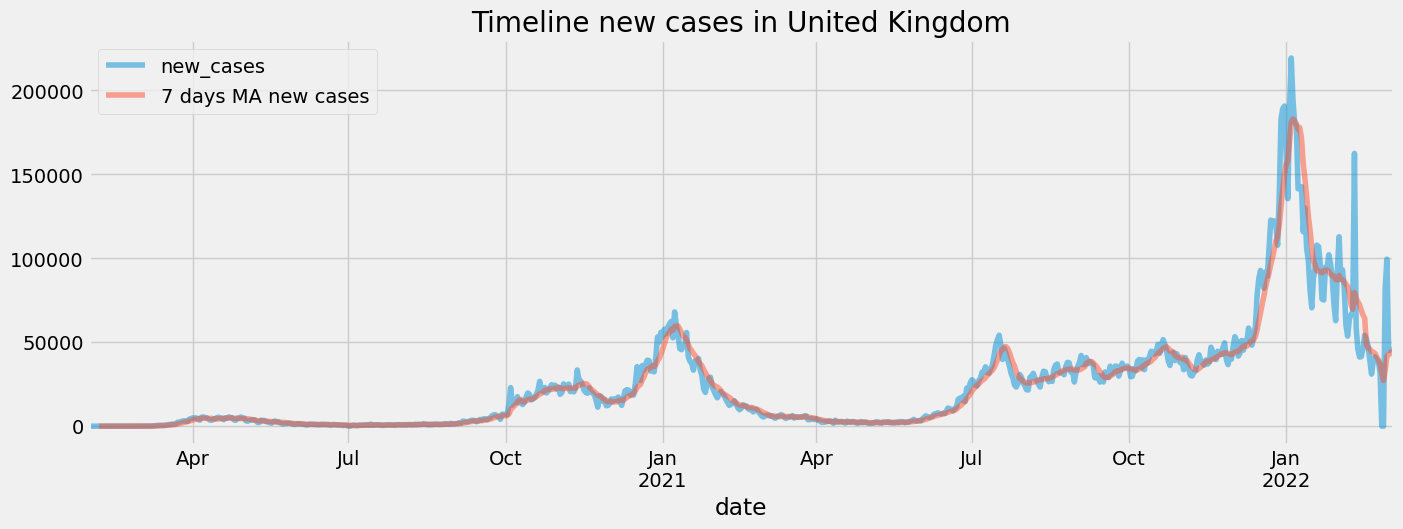

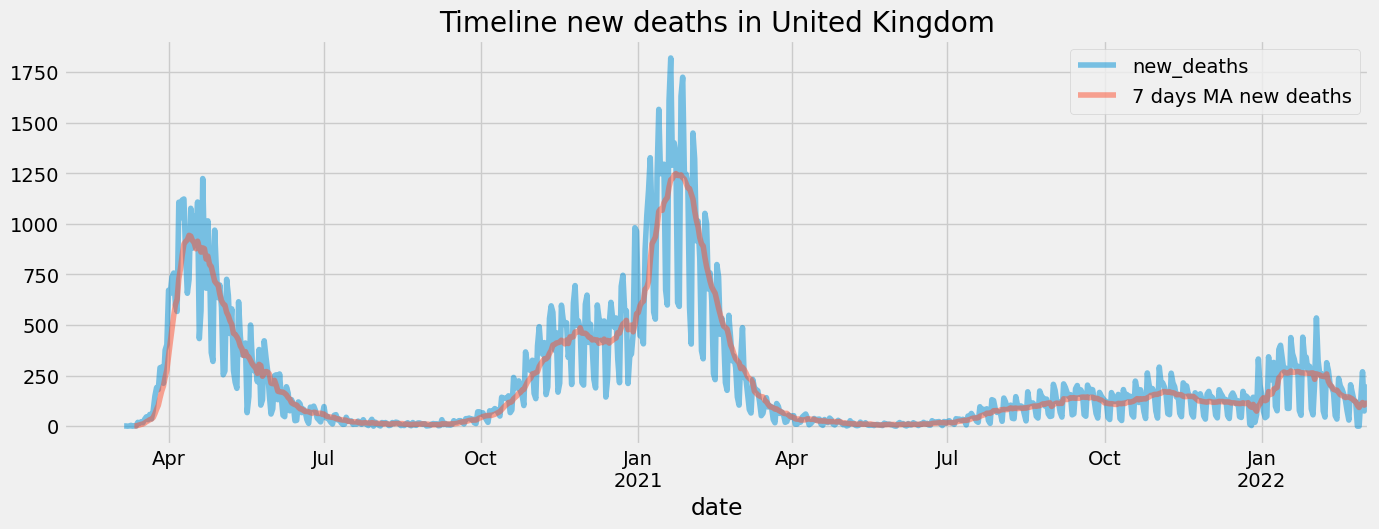

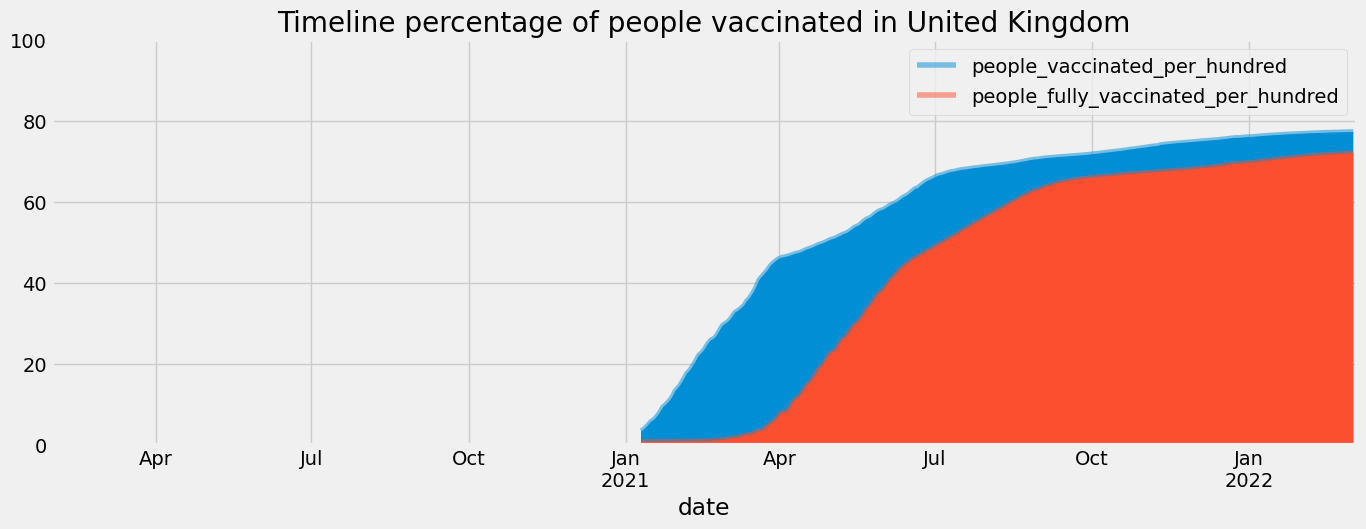

In [10]:
df_uk=create_and_plot_df(data, 'United Kingdom')

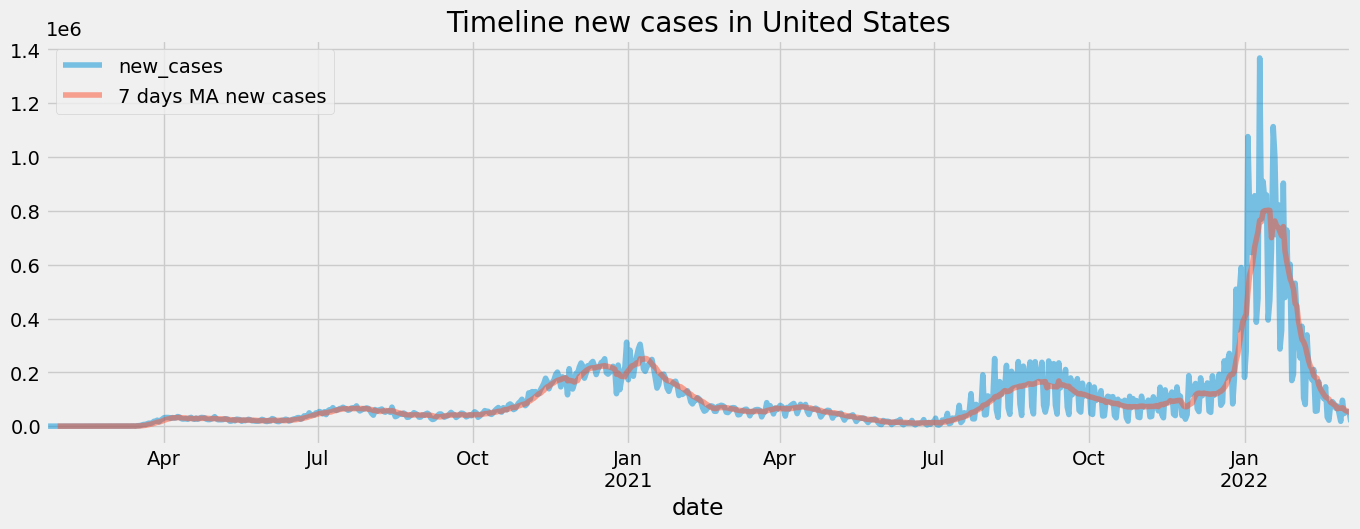

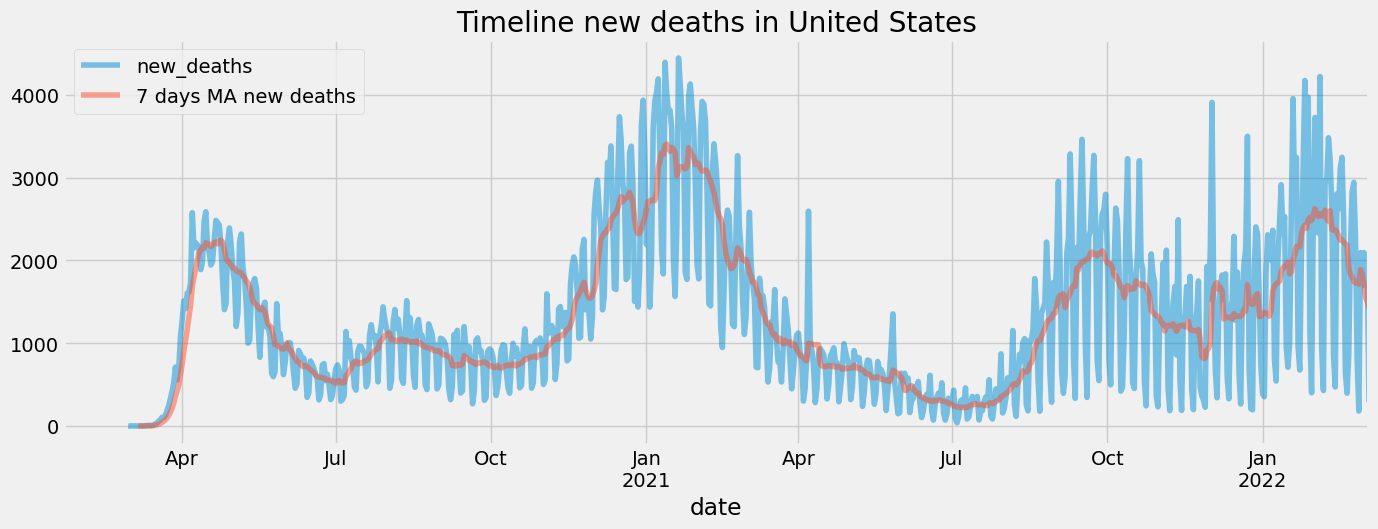

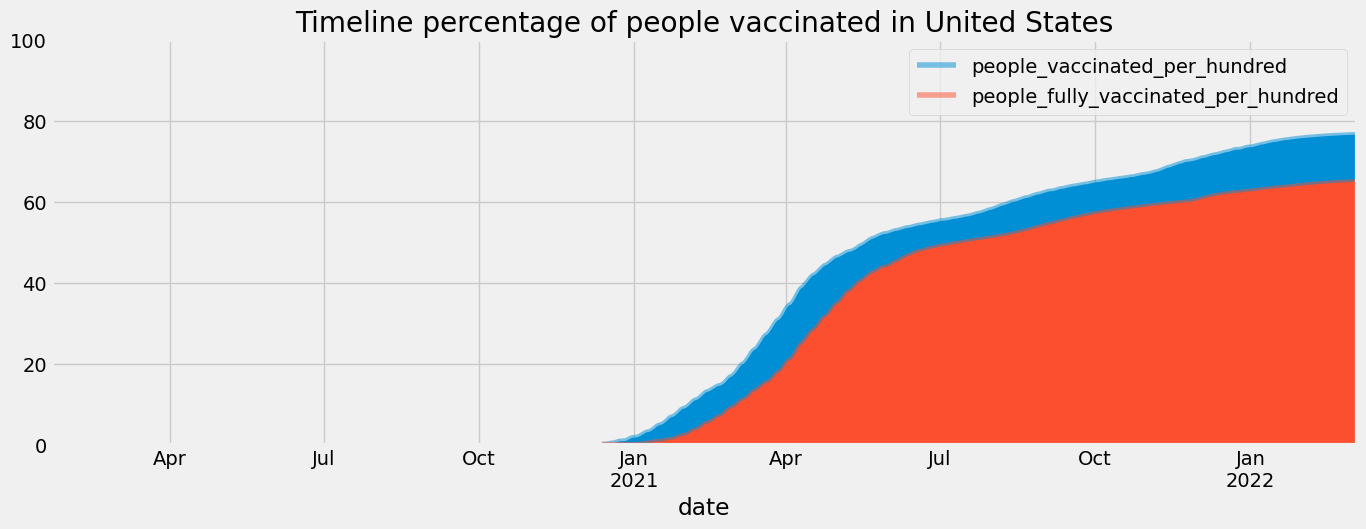

In [11]:
df_us=create_and_plot_df(data, 'United States')

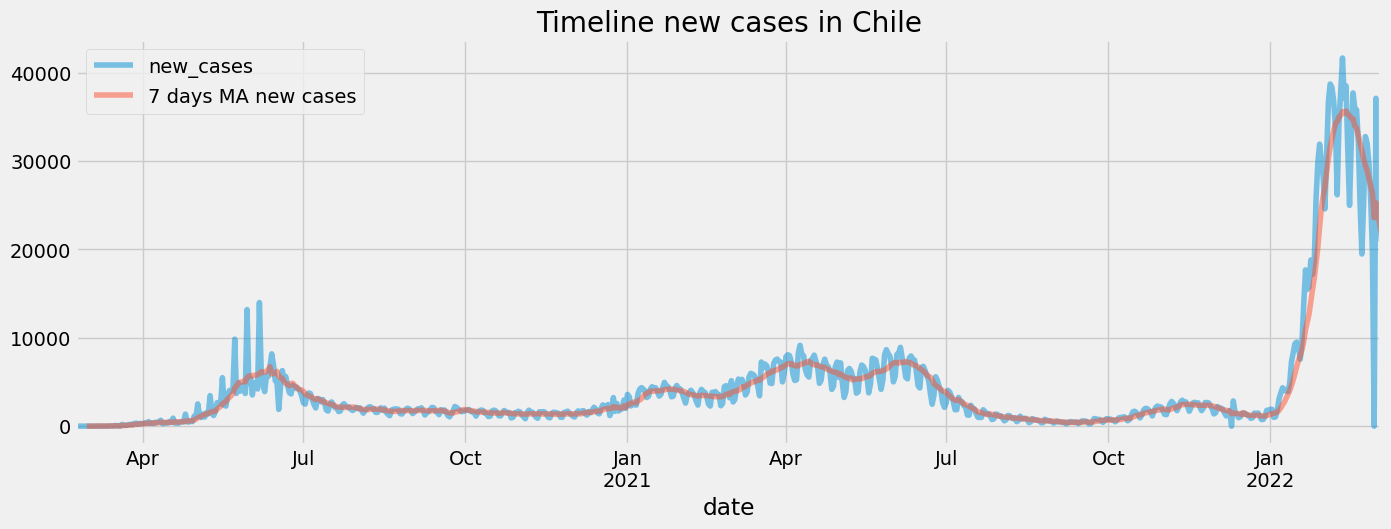

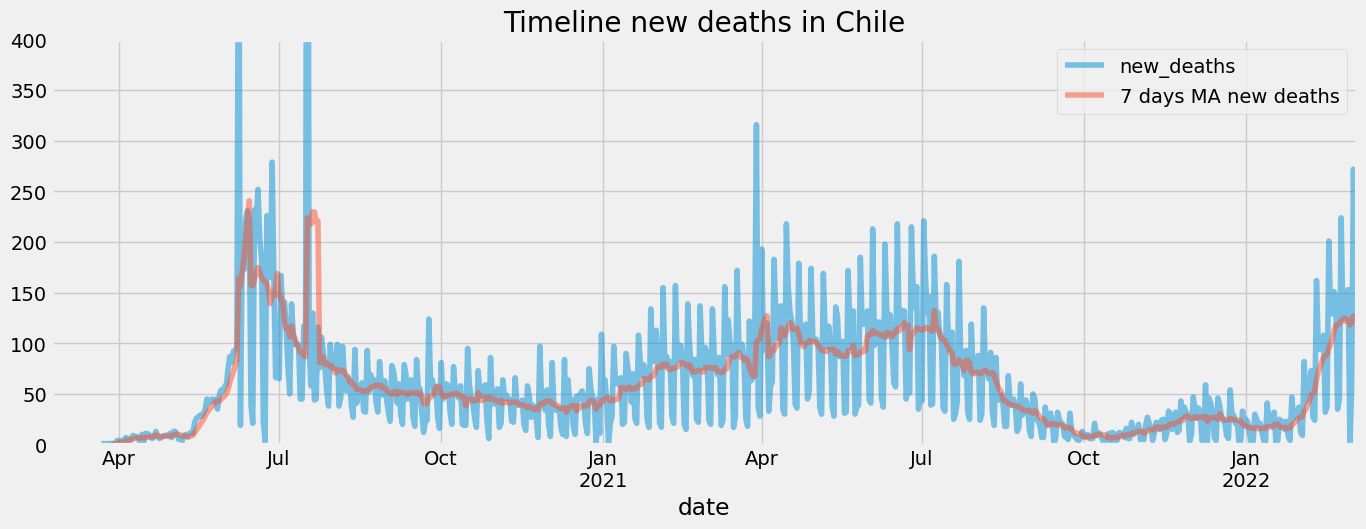

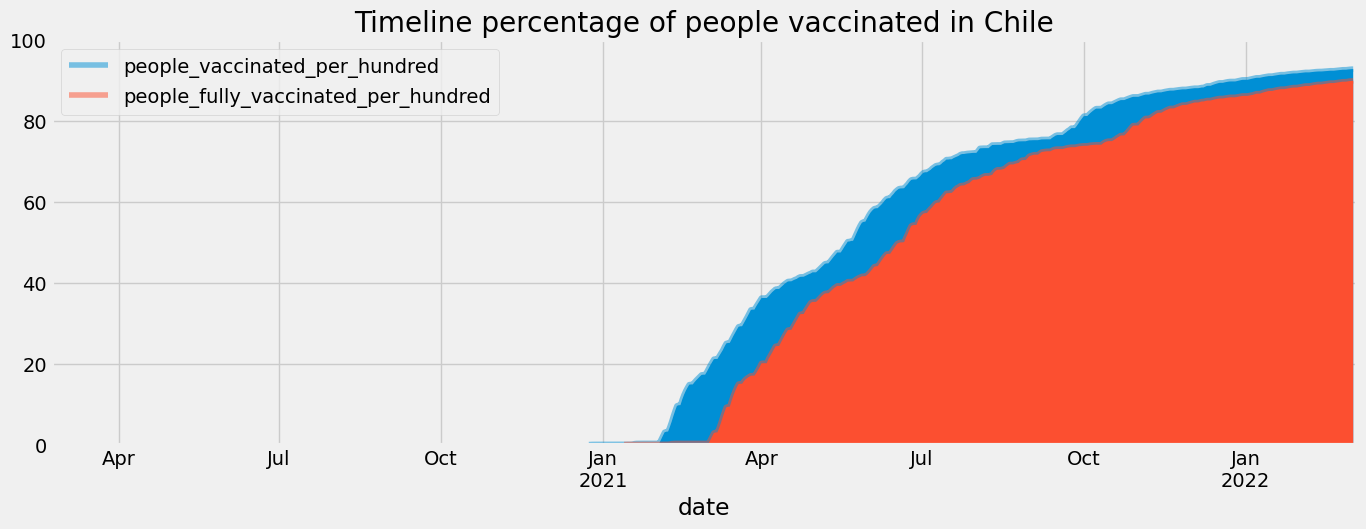

In [12]:
df_chile=create_and_plot_df(data, 'Chile')